# CNN model to detect wheat diseases

## Pre-requisites

### Importing libraries

In [1]:

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Setting the paths of the dataset and images to be classified

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
#print(os.listdir("/content/drive/My Drive/wheat-disease-detection-main-modified/wheat-disease-detection-main-modified"))
print(os.listdir("/content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified"))

In [ ]:
dataset_path = "/content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset"
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Le dossier '{dataset_path}' n'existe pas !")
klass_dir = "/content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/testCDD"
if not os.path.exists(klass_dir):
    raise FileNotFoundError(f"Le dossier '{klass_dir}' n'existe pas !")
validation_path = "/content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/validCDD"
if not os.path.exists(validation_path):
    raise FileNotFoundError(f"Le dossier '{validation_path}' n'existe pas !")

### Setting the parameters

In [ ]:
img_size = 64
num_classes = 3
batch_size = 32

### Creating the image and the labels

In [ ]:
from sklearn.preprocessing import LabelBinarizer

def load_dataset():
    images = []
    labels = []
    classes = os.listdir(dataset_path)
    label_binarizer = LabelBinarizer()
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):  # Check if the current item is a directory
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    image = cv2.imread(image_path)
                    if image is not None:  # Check if the image was loaded successfully
                        image = cv2.resize(image, (img_size, img_size))
                        images.append(image)
                        labels.append(class_name)
                    else:
                        print(f"Skipping invalid image: {image_path}")
                except Exception as e:
                    print(f"Error loading image: {image_path}")
                    print(str(e))
    # Convert labels to unique binary arrays
    labels = label_binarizer.fit_transform(labels)
    #return images, labels
    return images, labels, label_binarizer


In [ ]:

def load_validation_data():
    val_images = []
    val_labels = []
    val_classes = os.listdir(validation_path)
    for class_name in val_classes:
        class_dir = os.path.join(validation_path, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, (img_size, img_size))
                    val_images.append(image)
                    val_labels.append(class_name)
    # Convert to array and one-hot
    val_images = np.array(val_images).astype('float32') / 255.0
    val_labels = label_binarizer.transform(val_labels)
    return val_images, val_labels


Images that are not in the correct format are skipped.

In [ ]:
#modified
#images, labels = load_dataset()
images, labels, label_binarizer = load_dataset()

Skipping invalid image: /content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset/Wheat_crown_root_rot/00431.gif
Skipping invalid image: /content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset/Wheat_crown_root_rot/00421.gif
Skipping invalid image: /content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset/Wheat_crown_root_rot/00571.gif
Skipping invalid image: /content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset/Wheat_crown_root_rot/00531.gif
Skipping invalid image: /content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset/Wheat_crown_root_rot/00511.gif
Skipping invalid image: /content/drive/My Drive/examen c.rar (Unzipped Files)/wheat-disease-detection-main-modified/cropDiseaseDataset/Wheat_crown_root_rot/00541.gif
Skip

In [ ]:
val_images, val_labels = load_validation_data()


### Preprocessing the dataset

In [ ]:
def preprocess_dataset(images, labels):
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

In [ ]:
images, labels = preprocess_dataset(images, labels)

The labels after preprocessing are stored as a NumPy array

In [ ]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


## Creating the Convolutional Neural Network (CNN)

### Splitting the data into a training and testing set

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.1, random_state=42)

### Creating the CNN model

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Ajoute ça avant la dernière couche
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the CNN model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Augmenting the training data

In [ ]:

"""data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(train_images)"""

'data_generator = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)\ndata_generator.fit(train_images)'

### Training the model with the training data

The history variable stores the values of accuracy and loss after each epoch, which are then used to plot the graph

In [ ]:
#history = model.fit(data_generator.flow(train_images, train_labels, batch_size=batch_size), steps_per_epoch=len(train_images) // batch_size, epochs=120,validation_data=(val_images, val_labels))
history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=30, validation_data=(val_images, val_labels))



Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4777 - loss: 1.0309 - val_accuracy: 0.7826 - val_loss: 0.7128
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6057 - loss: 0.8837 - val_accuracy: 0.8696 - val_loss: 0.4594
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6707 - loss: 0.7662 - val_accuracy: 0.8696 - val_loss: 0.2865
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7180 - loss: 0.6933 - val_accuracy: 0.9130 - val_loss: 0.3226
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7572 - loss: 0.5887 - val_accuracy: 1.0000 - val_loss: 0.2094
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8230 - loss: 0.4769 - val_accuracy: 1.0000 - val_loss: 0.0961
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8537 - loss: 0.3863 - val_accuracy: 1.0000 - val_loss: 0.0617
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8877 - loss: 0.3189 - val_accuracy: 1.0000 - val_loss

### The graphs of accuracy and loss after each epoch are plotted

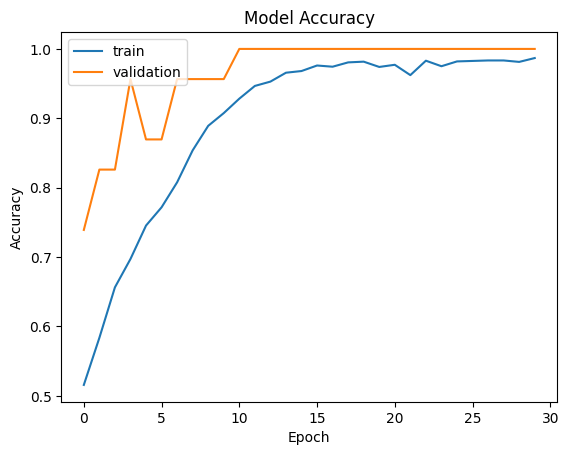

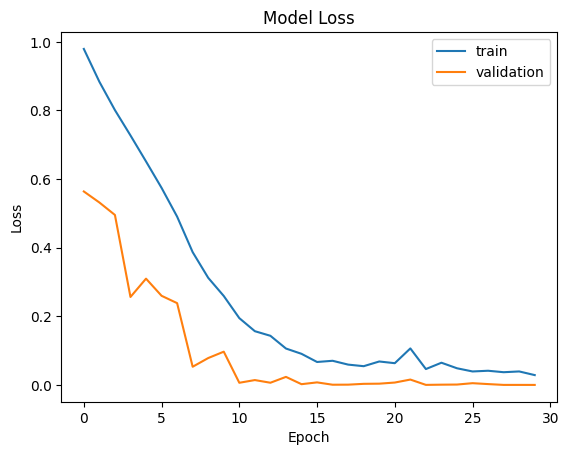

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Evaluating the model

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


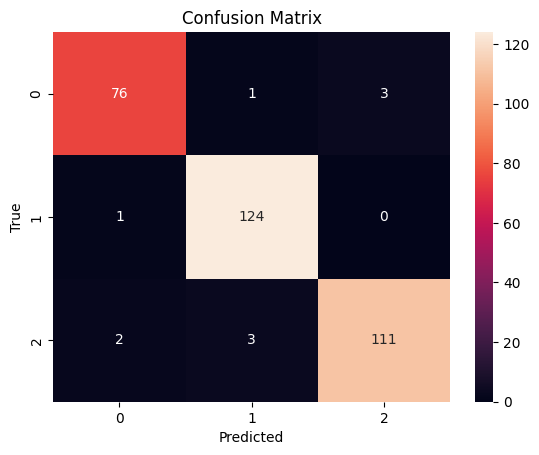

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        80
           1       0.97      0.99      0.98       125
           2       0.97      0.96      0.97       116

    accuracy                           0.97       321
   macro avg       0.97      0.97      0.97       321
weighted avg       0.97      0.97      0.97       321



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes))


The model's loss and accuracy is evaluted against the test data

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9612 - loss: 0.0699
Test Loss: 0.0697866752743721
Test Accuracy: 0.9688473343849182


In [ ]:
final_val_acc = history.history['val_accuracy'][-1]
print(f"Validation Accuracy : {final_val_acc:.5f}")


Validation Accuracy :0.99862853227542467


--------------------------------------------------------------------------------------------------------------------------------------------

### Saving the model

The model is saved as an H5 file. This format is used as both weights and model configuration can be stored in the same file.

In [ ]:
model.save('wheatDiseaseModel.h5')